**Downloading the dataframe**

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749 -O aerofit_treadmill.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv
100% 7.28k/7.28k [00:00<00:00, 17.6MB/s]


**Read the dataframe**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_org = pd.read_csv('aerofit_treadmill.csv')
df_org

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


**Please Note:** *These are the questions asked in what good looks like. Main questions will start after completing this questions.*

**What good looks like?**

**1. Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset**

**Shape of the dataframe**

In [4]:
df_org.shape

(180, 9)

**Datatype of each column**

In [5]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
df_org.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Let’s create a copy of the original DataFrame to ensure the original data remains unchanged**

In [7]:
df_final = df_org.copy()

**Identifying the NaN values**

In [8]:
df_nan = round(df_final.isna().sum()/len(df_final)*100, 2)
df_nan = df_nan[df_nan > 0]
df_nan.name = 'NaN Percentage'
df_nan

,NaN Percentage


This shows there are no NaN data available in the dataframe

**Identifying the columns which has space-padded string values:**

In [9]:
for column in df_final.columns:
  df_space_padded = df_final[df_final[column].astype(str).apply(lambda x: x.startswith(' ') or x.endswith(' '))]
  if len(df_space_padded) > 0:
    print(f'\033[1mcolumn {column} has {len(df_space_padded)} space-padded␣rows\033[0m')
  else:
    print(f'column {column} has {len(df_space_padded)} space-padded rows')

column Product has 0 space-padded rows
column Age has 0 space-padded rows
column Gender has 0 space-padded rows
column Education has 0 space-padded rows
column MaritalStatus has 0 space-padded rows
column Usage has 0 space-padded rows
column Fitness has 0 space-padded rows
column Income has 0 space-padded rows
column Miles has 0 space-padded rows


There are no columns which has space padded values

**Identifying the columns which has empty string values:**

In [10]:
for column in df_final.columns:
  df_blank_val = df_final[df_final[column].astype(str).str.strip() == '']
  print(f'column {column} has {len(df_space_padded)} empty data')

column Product has 0 empty data
column Age has 0 empty data
column Gender has 0 empty data
column Education has 0 empty data
column MaritalStatus has 0 empty data
column Usage has 0 empty data
column Fitness has 0 empty data
column Income has 0 empty data
column Miles has 0 empty data


No row has an empty string

**Let us try doing Un-nesting the Columns and see if any column contains comma separated values by creating multiple rows**

In [11]:
exp_df = df_org.copy()
col_to_explode = ['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage', 'Fitness', 'Income', 'Miles']
def explode_column(df, col_name):
  df[col_name] = df[col_name].astype(str).apply(lambda x : [i.strip() for i in x.split(',')])
  temp_df = df.explode(col_name, ignore_index = True)
  temp_df[col_name] = temp_df[col_name].replace('nan', np.nan)
  return temp_df
for col in col_to_explode:
  exp_df = explode_column(exp_df, col)
exp_df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


The dataframe still shows 180 rows that means there are no comma separated values and the data is clean

**2. Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)**

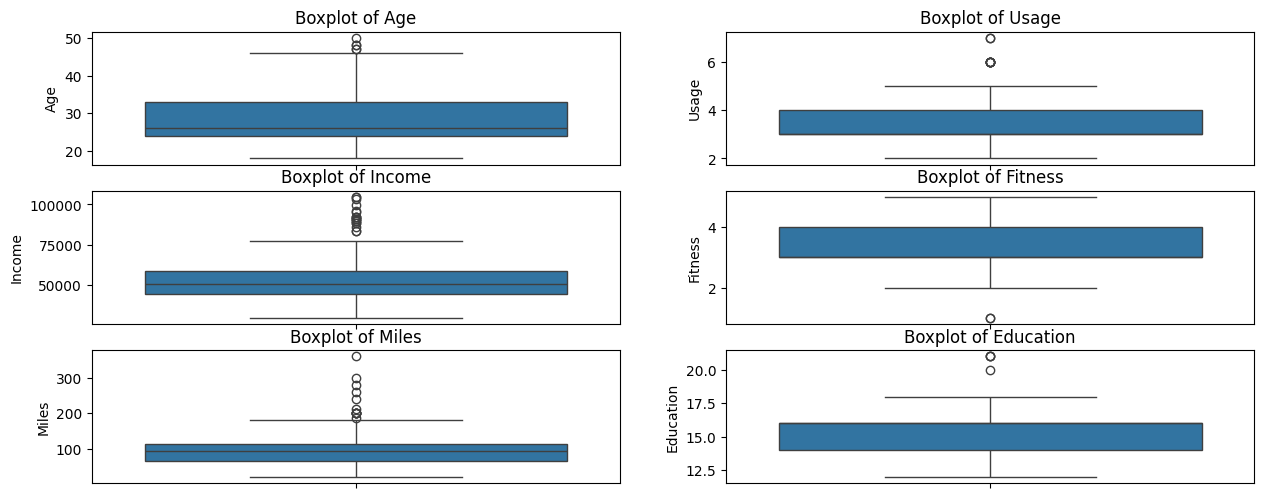

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
num_cols = ['Age', 'Usage', 'Income', 'Fitness', 'Miles', 'Education']
for i, col in enumerate(num_cols, 1):
    plt.subplot(5,2, i)
    sns.boxplot(y=df_final[col], data = df_final)
    plt.title(f'Boxplot of {col}')
plt.show()

1. Based on the boxplot of age, it can be concluded that very few individuals above the age of 45 use the treadmill.

2. The boxplot of usage indicates that individuals identified as outliers tend to use the treadmill more than five times per week.

3. Individuals with earnings exceeding $75,000 appear to spend less time on the treadmill.

4. The boxplot of fitness suggests that one or two individuals exhibit notably low fitness levels.

5. From the boxplot of miles, it is evident that individuals falling in the outlier range use the treadmill extensively.

6. The boxplot of education shows that very few individuals with more than 20 years of education use the treadmill.



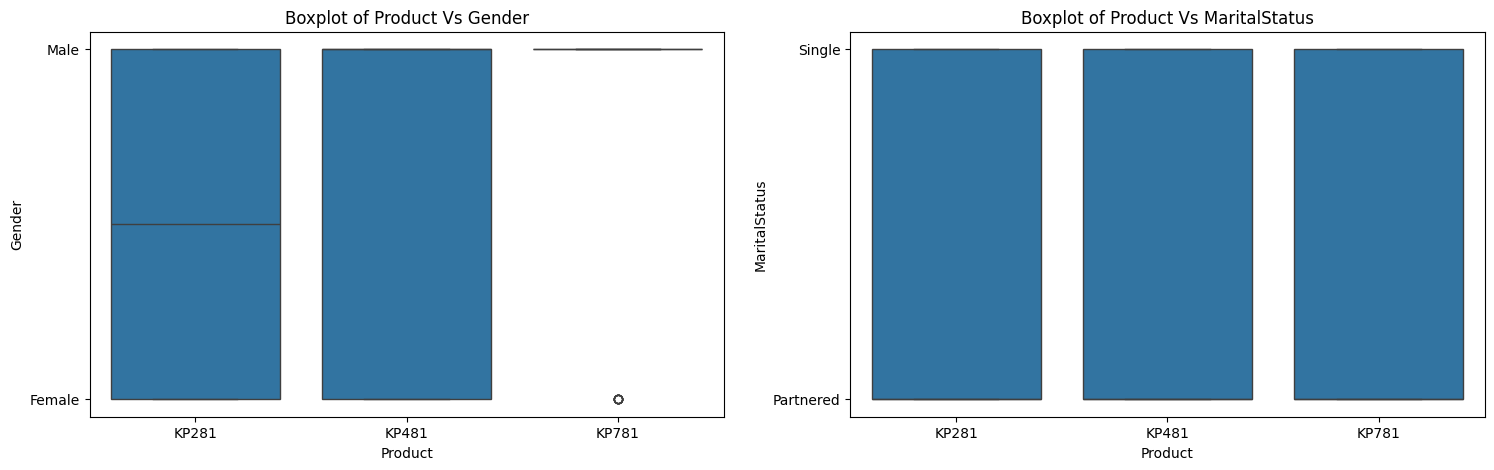

In [13]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_final['Product'], y=df_final['Gender'], data=df_final)
plt.title("Boxplot of Product Vs Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_final['Product'], y=df_final['MaritalStatus'], data=df_final)
plt.title("Boxplot of Product Vs MaritalStatus")

plt.show()

Product KP781 is predominantly used by males, while KP281 and KP481 have a more balanced gender usage.

There is no significant difference in product usage between single and partnered individuals.

**“describe” method by checking the difference between mean and median**

In [14]:
df_describe = df_final.describe()
df_describe

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [15]:
difference = (df_describe.loc['mean'] - df_describe.loc['50%']).reset_index().T
difference

,0,1,2,3,4,5
index,Age,Education,Usage,Fitness,Income,Miles
0,2.788889,-0.427778,0.455556,0.311111,3123.077778,9.194444



This analysis is especially useful for identifying the presence of outliers or deciding whether to use mean or median in reporting

**3. Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)**

**MaritalStatus Vs Product**

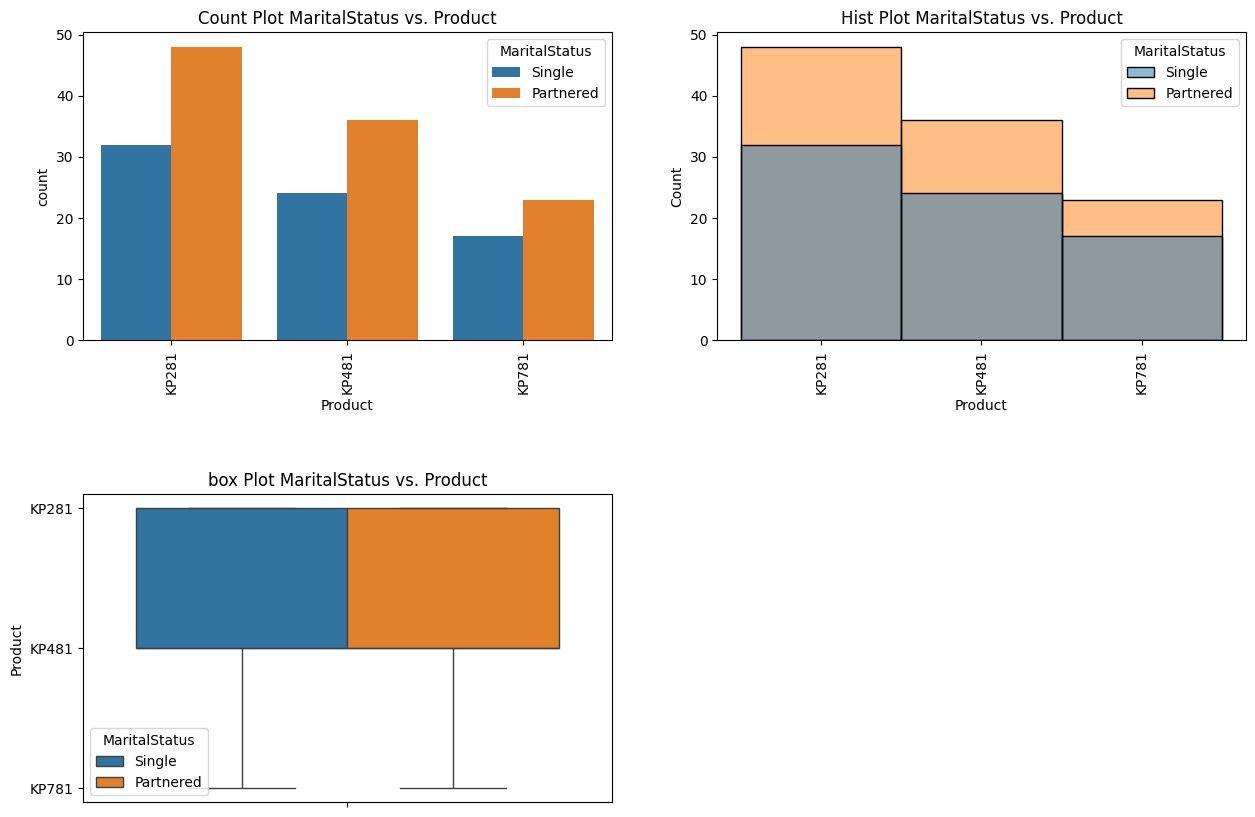

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# Subplot 1: Countplot for 'Product' vs 'MaritalStatus
plt.subplot(2, 2, 1)
sns.countplot(x='Product', hue='MaritalStatus', data=df_final)
plt.xticks(rotation=90)
plt.title("Count Plot MaritalStatus vs. Product")
# Subplot 2: histplot for for 'Product' vs 'MaritalStatus
plt.subplot(2, 2, 2)
sns.histplot(x='Product', hue='MaritalStatus', data=df_final)
plt.xticks(rotation=90)
plt.title("Hist Plot MaritalStatus vs. Product")
# Subplot 3: Boxplot for 'Product' vs 'MaritalStatus
plt.subplot(2, 2, 3)
sns.boxplot(y='Product', hue='MaritalStatus', data=df_final)
plt.xticks(rotation=90)
plt.title("box Plot MaritalStatus vs. Product")
plt.subplots_adjust(hspace=0.5)
plt.show()

**Age Vs Product**

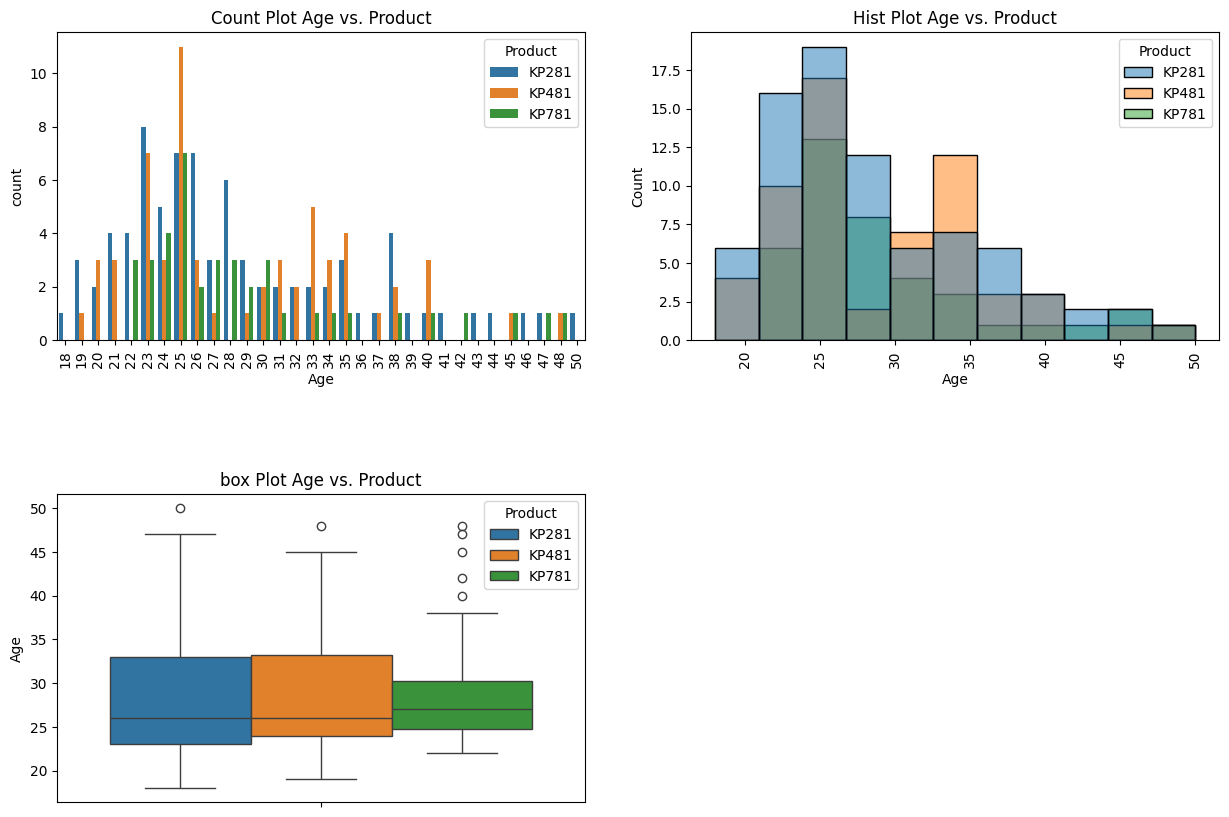

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# Subplot 1: Countplot for 'Age' vs 'Product'
plt.subplot(2, 2, 1)
sns.countplot(x='Age', hue='Product', data=df_final)
plt.xticks(rotation=90)
plt.title("Count Plot Age vs. Product")
# Subplot 2: histplot for for 'Age' vs 'Product'
plt.subplot(2, 2, 2)
sns.histplot(x='Age', hue='Product', data=df_final)
plt.xticks(rotation=90)
plt.title("Hist Plot Age vs. Product")
# Subplot 3: Boxplot for 'Age' vs 'Product'
plt.subplot(2, 2, 3)
sns.boxplot(y='Age', hue='Product', data=df_final)
plt.xticks(rotation=90)
plt.title("box Plot Age vs. Product")
plt.subplots_adjust(hspace=0.5)
plt.show()

**4. Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)**

In [18]:
product_counts = pd.crosstab(index=df_final['Product'], columns='count')

# Convert to percentage (marginal probability)
product_percentage = round((product_counts / product_counts.sum()) * 100,2)

product_percentage.columns= ['Marginal Probability']
product_percentage

,Marginal Probability
Product,
KP281,44.44
KP481,33.33
KP781,22.22


**5. Check correlation among different factors using heat maps or pair plots.**

In [19]:
num_df = df_final.select_dtypes(include=[int])
num_df

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [20]:
num_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


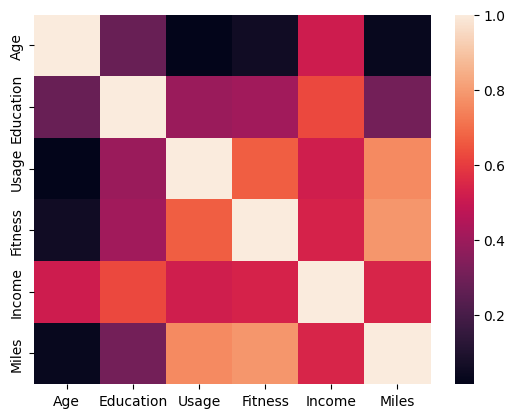

In [21]:
sns.heatmap(num_df.corr())
plt.show()

**6. With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?**

In [22]:
pd.crosstab(index = df_final['Product'],
            columns = df_final['Gender'],
            margins=True,
            normalize='index')

Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000
All,0.422222,0.577778


probability of a male customer buying a KP781 treadmill is 82.50%

In [23]:
pd.crosstab(index = df_final['Product'],
            columns = df_final['Gender'],
            margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


**8. Probability- marginal, conditional probability.**

**Marginal Probability:**

P(KP281) = 80/180 = 0.4444

P(KP481) = 60/180 = 0.3333

P(KP781) = 40/180 = 0.2222

P(Female) = 76/180 = 0.4222

P(Male) = 104/180 = 0.5777

**Conditional Probability -**

**Find the p(KP281) given that customer is female:**

P(KP281|F) = P(KP281 n F)/ P(F) = 40/76 = 0.5263

**Find the p(KP281) given that customer is male:**

P(KP281|M) = P(KP281 n M)/ P(M) = 40/104 = 0.3846

**Find the p(KP481) given that customer is female:**

P(KP481|F) = P(KP481 n F)/ P(F) = 29/76 = 0.3815

**Find the p(KP481) given that customer is male:**

P(KP481|M) = P(KP481 n M)/ P(M) = 31/104 = 0.2980

**Find the p(KP781) given that customer is female:**

P(KP781|F) = P(KP781 n F)/ P(F) = 7/76 = 0.0921

**Find the p(KP781) given that customer is male:**

P(KP781|M) = P(KP781 n M)/ P(M) = 33/104 = 0.3173

In [24]:
pd.crosstab(index = df_final['Product'],
            columns = df_final['MaritalStatus'],
            margins=True)

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


**Marginal Probability:**

P(KP281) = 80/180 = 0.4444

P(KP481) = 60/180 = 0.3333

P(KP781) = 40/180 = 0.2222

P(Partnered) = 107/180 = 0.5944

P(Single) = 73/180 = 0.4055

**Conditional Probabilty:**

**Given Marital status is Partnered , find the probability of buying KP281?**

P(KP281|Partnered) = P(KP281 n Partnered)/P(Partnered) = 48/107 = 0.4485

**Given Marital status is Single , find the probability of buying KP281?**

P(KP281|Single) = P(KP281 n Single)/P(Single) = 32/73 = 0.4383

**Given Marital status is Partnered , find the probability of buying KP481?**

P(KP481|Partnered) = P(KP481 n Partnered)/P(Partnered) = 36/107 = 0.3364

**Given Marital status is Single , find the probability of buying KP481?**

P(KP481|Single) = P(KP481 n Single)/P(Single) = 24/73 = 0.3287

**Given Marital status is Partnered , find the probability of buying KP781?**

P(KP781|Partnered) = P(KP781 n Partnered)/P(Partnered) = 23/107 = 0.2149

**Given Marital status is Single , find the probability of buying KP781?**

P(KP781|Single) = P(KP781 n Single)/P(Single) = 17/73 = 0.2328

**Note: Main question starts from here**

****Evaluation Criteria****

**Q.1 Defining Problem Statement and Analysing basic metrics**

**Answer:**

**Problem Statement:**

The objective is to analyze the characteristics of customers purchasing different AeroFit treadmill models (KP281, KP481, KP781). This analysis will enable us to:

Identify customer preferences for each treadmill model

Develop detailed customer profiles for every product

Enhance marketing strategies and provide more accurate product recommendations to new customers

**Q1.1 Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary**

**Shape of data**

In [25]:
df_final.shape

(180, 9)

**Data types of all the attributes**

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Conversion of categorical attributes to 'category'**

In [27]:
categorical_df = df_final.copy()
categorical_df['Product'] = categorical_df['Product'].astype('category')
categorical_df['Gender'] = categorical_df['Gender'].astype('category')
categorical_df['MaritalStatus'] = categorical_df['MaritalStatus'].astype('category')
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


**Statistical summary**

In [28]:
categorical_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation:**

**Age:** Majority are young adults with a mean age of ~29 years.

**Education:** Most individuals have college-level education (around 16 years).

**Usage:** Users show moderate engagement with a typical usage rating around 3–4.

**Fitness:** Average fitness levels with most people rating themselves as average (3).

**Income:** Wide income range with a mean around 53K and some earning over 100K.

**Miles:** Travel/activity distance varies greatly, with some outliers going up to 360 miles.

In [29]:
cat_summary = categorical_df.describe(include='category').T
cat_summary

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Observation:**

Product: KP281 is the most popular product, chosen by 80 out of 180 individuals.

Gender: The majority of respondents are male (104 out of 180).

MaritalStatus: Most individuals are partnered, making up 107 of the sample.

In [30]:
categorical_df.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


None of the column shows NaN / missing values.

**Q2. Non-Graphical Analysis: Value counts and unique attributes**

In [31]:
df_final['Product'].value_counts()

,count
Product,
KP281,80
KP481,60
KP781,40


In [32]:
df_final['Gender'].value_counts()

,count
Gender,
Male,104
Female,76


In [33]:
df_final['MaritalStatus'].value_counts()

,count
MaritalStatus,
Partnered,107
Single,73


In [34]:
df_final['Usage'].value_counts()

,count
Usage,
3,69
4,52
2,33
5,17
6,7
7,2


In [35]:
df_final['Fitness'].value_counts()

,count
Fitness,
3,97
5,31
2,26
4,24
1,2


In [36]:
df_final['Age'].value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Age,25,23,24,26,28,33,35,22,30,27,...,47,18,41,39,36,43,46,44,50,42
count,25,18,12,12,9,8,8,7,7,7,...,2,1,1,1,1,1,1,1,1,1


In [64]:
df_final['Education'].value_counts()

,count
Education,
16,85
14,55
18,23
15,5
13,5
12,3
21,3
20,1


In [37]:
df_final['Income'].value_counts()

,count
Income,
45480,14
52302,9
53439,8
54576,8
46617,8
...,...
85906,1
99601,1
103336,1


In [38]:
df_final['Miles'].value_counts().reset_index().T

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
Miles,85,95,66,75,47,106,113,94,53,100,...,188,169,80,140,21,240,300,280,260,360
count,27,12,10,10,9,9,8,8,7,7,...,1,1,1,1,1,1,1,1,1,1


**Q3. Visual Analysis - Univariate & Bivariate**

**Q.3.1. For continuous variable(s): Distplot, countplot, histogram for univariate analysis**

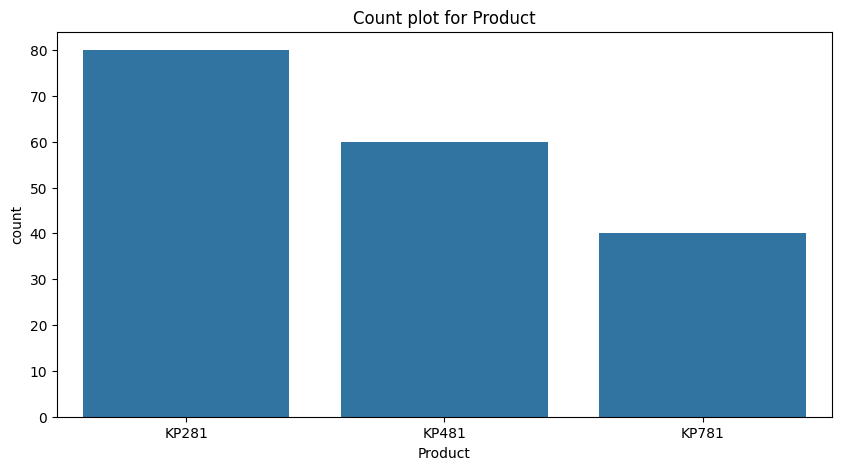

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x = df_final['Product'], data=df_final)
plt.title('Count plot for Product')
plt.show()

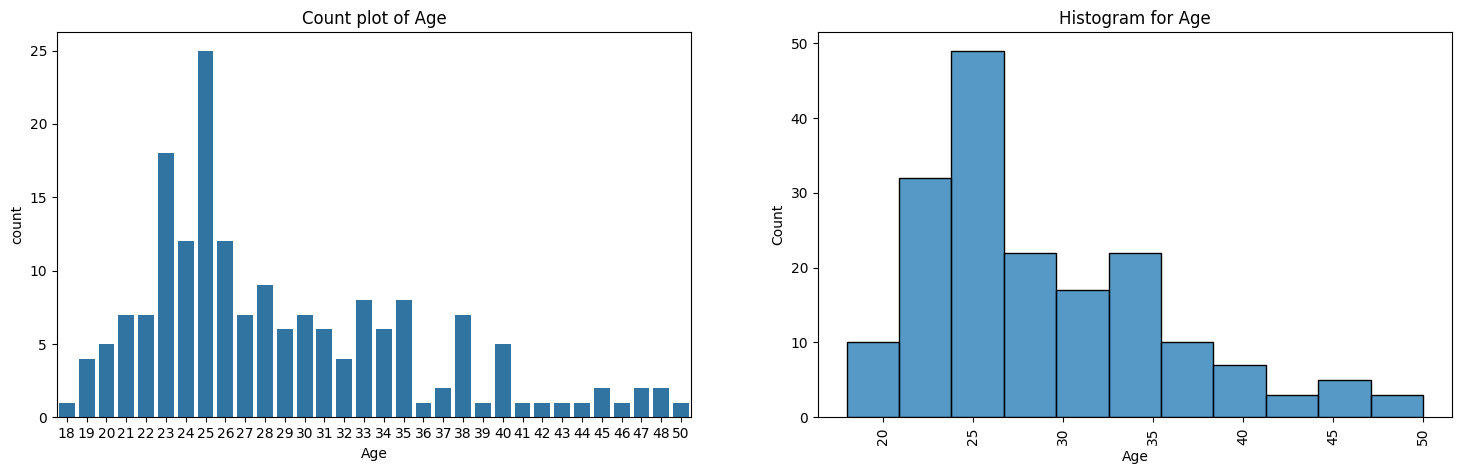

In [40]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title("Count plot of Age")
sns.countplot(x=df_final['Age'], data=df_final)


plt.subplot(1, 2, 2)
plt.title("Histogram for Age")
sns.histplot(x='Age',data=df_final)
plt.xticks(rotation=90)

plt.show()

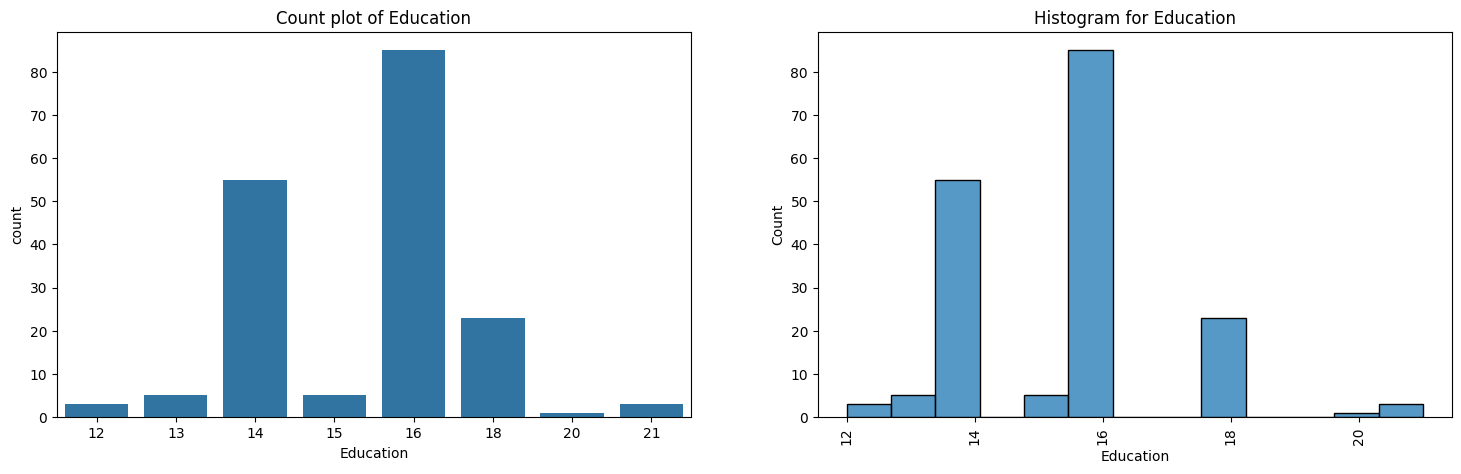

In [41]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title("Count plot of Education")
sns.countplot(x=df_final['Education'], data=df_final)


plt.subplot(1, 2, 2)
plt.title("Histogram for Education")
sns.histplot(x='Education',data=df_final)
plt.xticks(rotation=90)

plt.show()

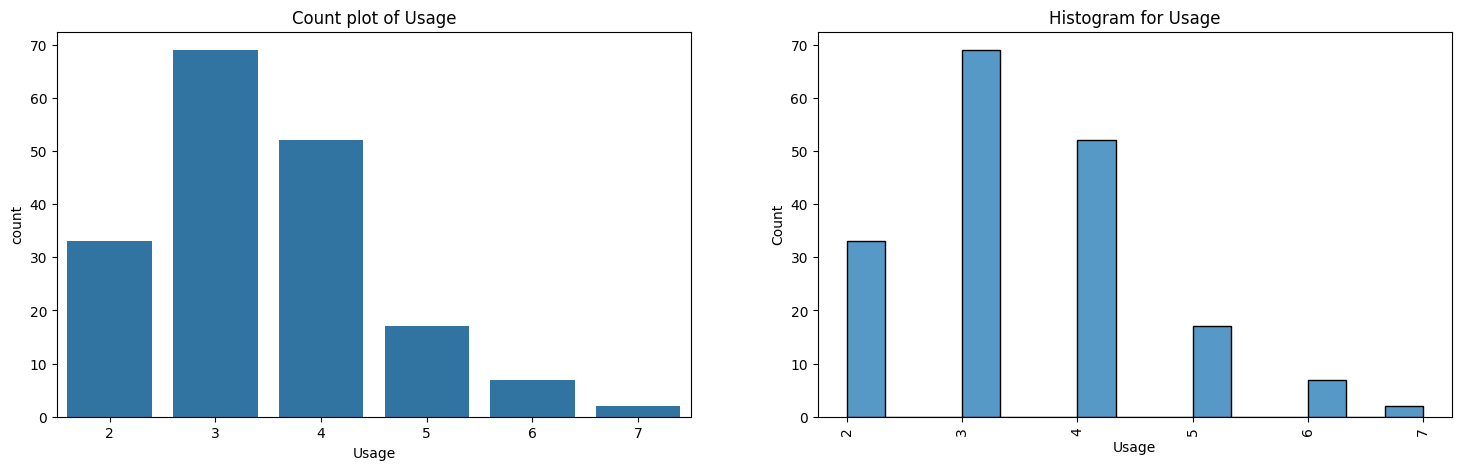

In [42]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title("Count plot of Usage")
sns.countplot(x=df_final['Usage'], data=df_final)


plt.subplot(1, 2, 2)
plt.title("Histogram for Usage")
sns.histplot(x='Usage',data=df_final)
plt.xticks(rotation=90)

plt.show()

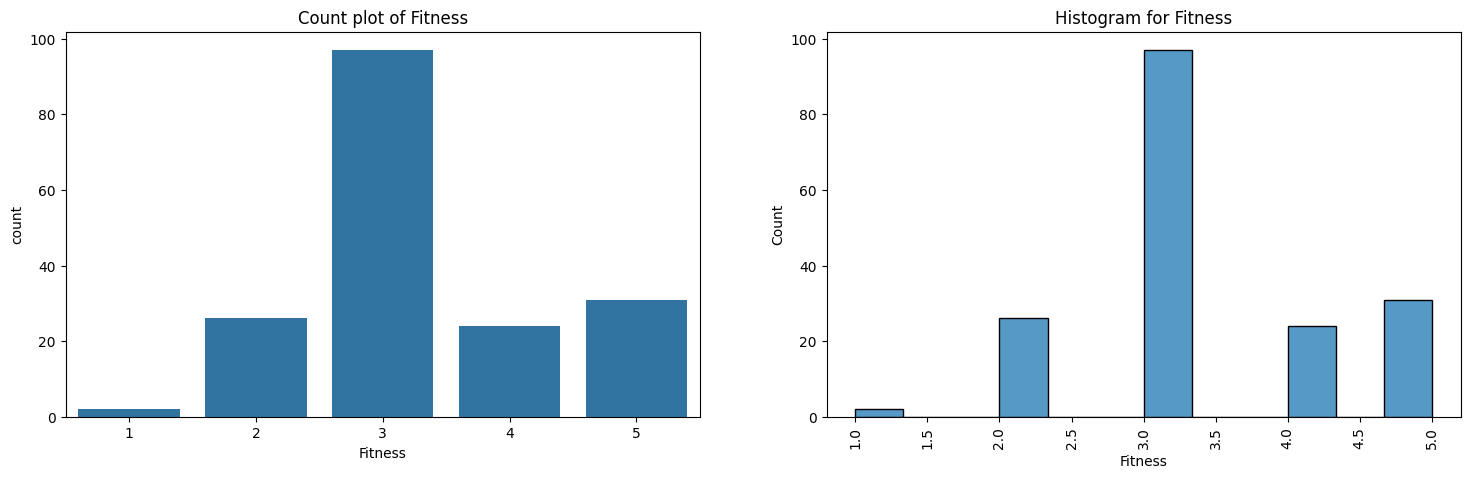

In [43]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title("Count plot of Fitness")
sns.countplot(x=df_final['Fitness'], data=df_final)

plt.subplot(1, 2, 2)
plt.title("Histogram for Fitness")
sns.histplot(x='Fitness',data=df_final)
plt.xticks(rotation=90)

plt.show()

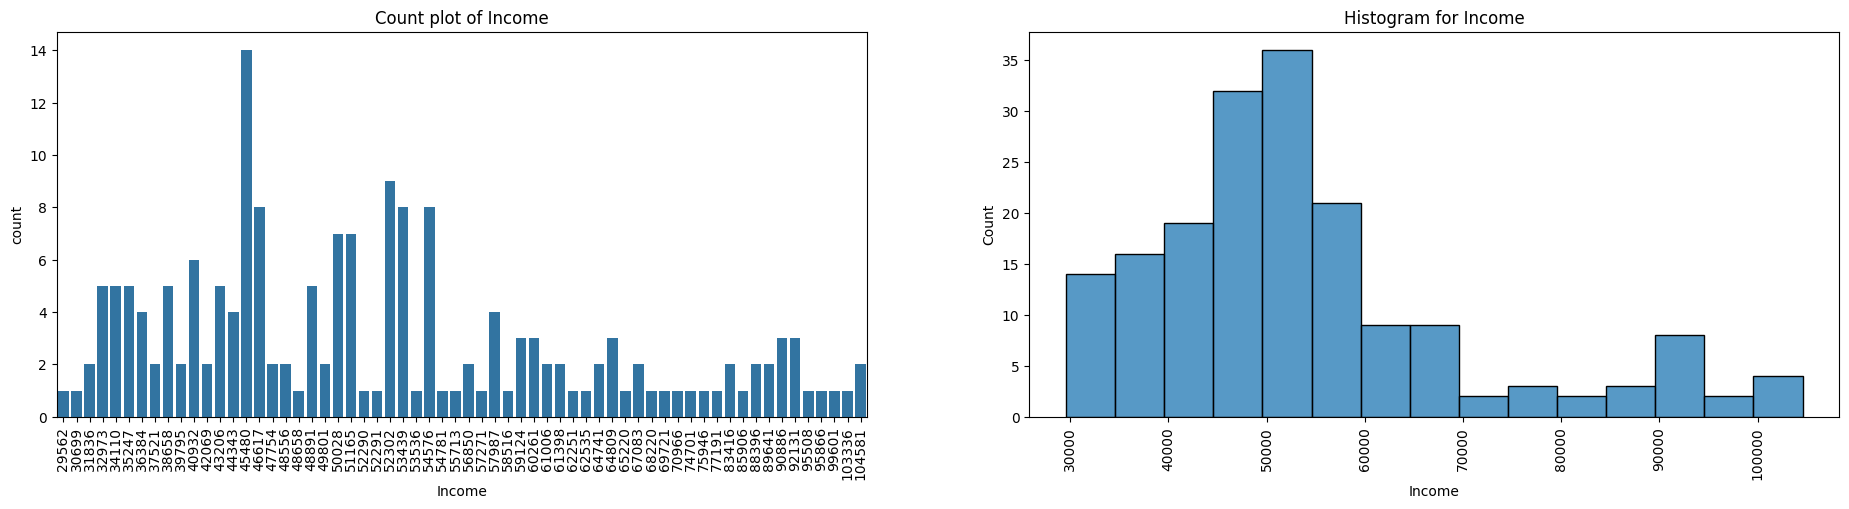

In [44]:
plt.figure(figsize=(23,5))

plt.subplot(1, 2, 1)
plt.title("Count plot of Income")
sns.countplot(x=df_final['Income'], data=df_final)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title("Histogram for Income")
sns.histplot(x='Income',data=df_final)
plt.xticks(rotation=90)

plt.show()

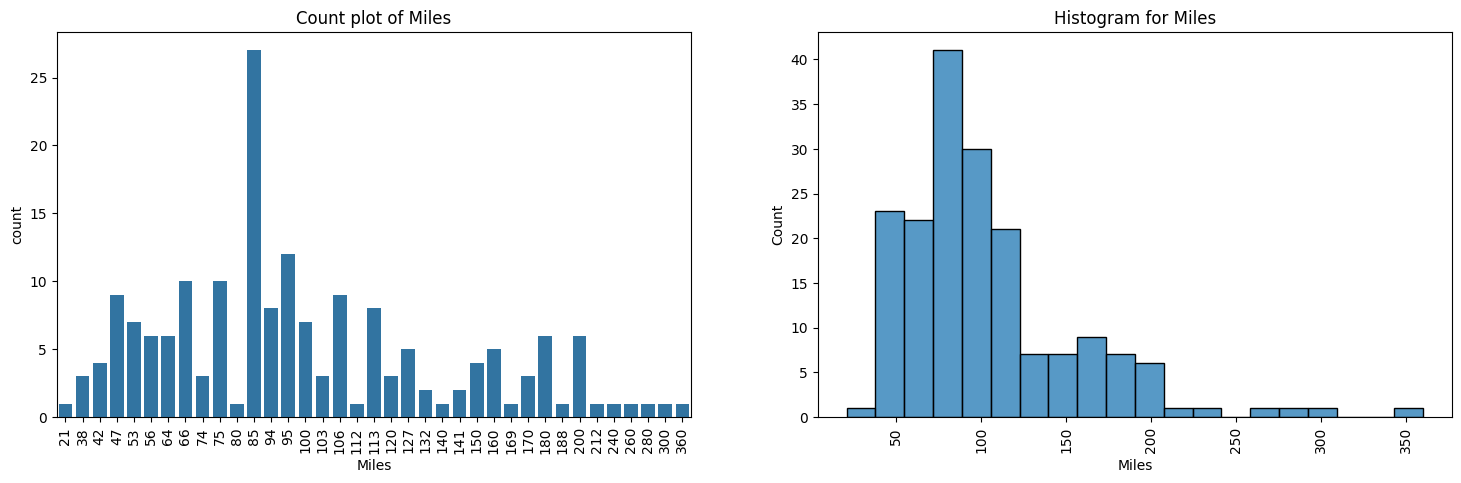

In [45]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title("Count plot of Miles")
sns.countplot(x=df_final['Miles'], data=df_final)
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
plt.title("Histogram for Miles")
sns.histplot(x='Miles',data=df_final)
plt.xticks(rotation=90)

plt.show()

**Please note that distplot is deprecated therefore, we are using histogram with KDE = true**

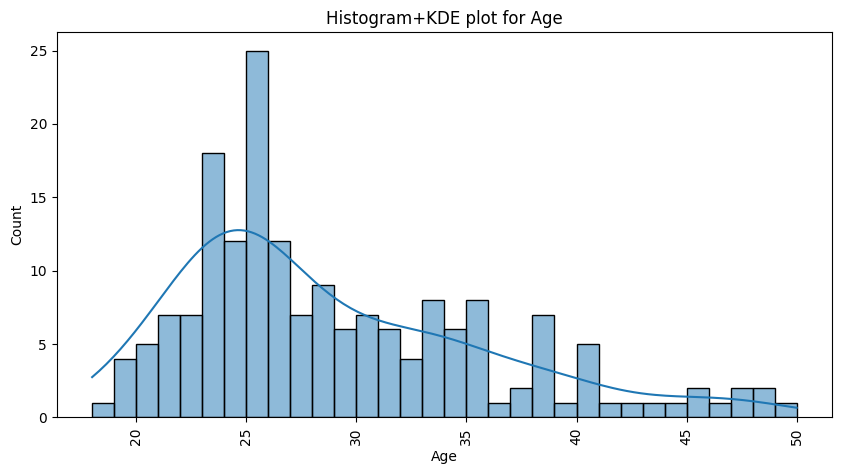

In [46]:
plt.figure(figsize=(10,5))
plt.title("Histogram+KDE plot for Age")
sns.histplot(x = df_final['Age'], bins=(len(df_final['Age'].unique())), kde = True)
plt.xticks(rotation = 90)
plt.show()

**Bivariate**

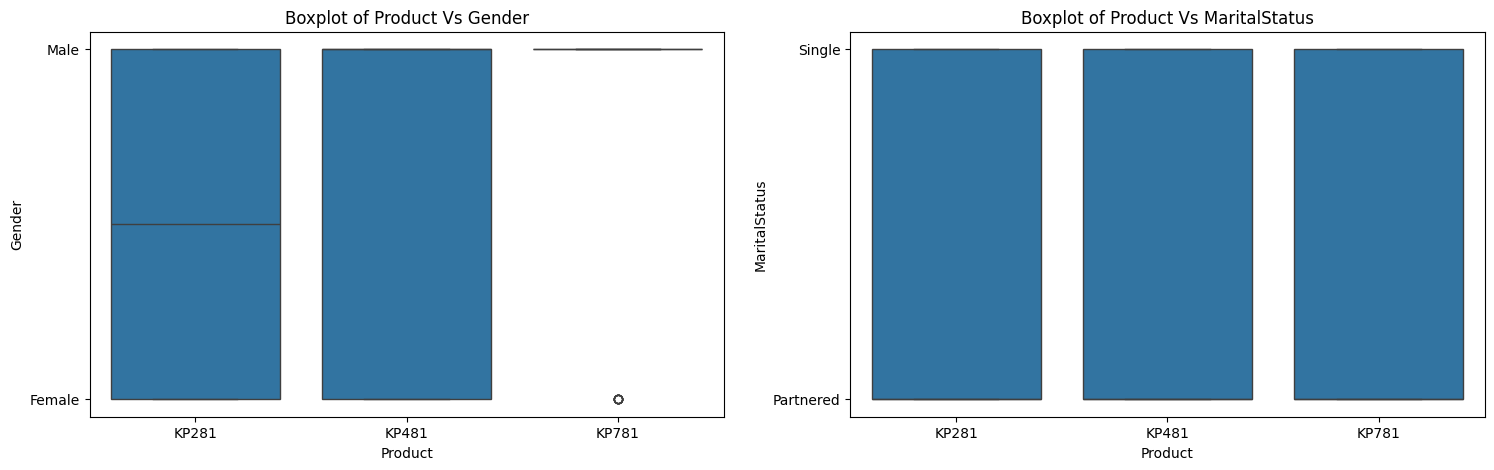

In [47]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_final['Product'], y=df_final['Gender'], data=df_final)
plt.title("Boxplot of Product Vs Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_final['Product'], y=df_final['MaritalStatus'], data=df_final)
plt.title("Boxplot of Product Vs MaritalStatus")

plt.show()

**Q.3.2. For categorical variable(s): Boxplot**

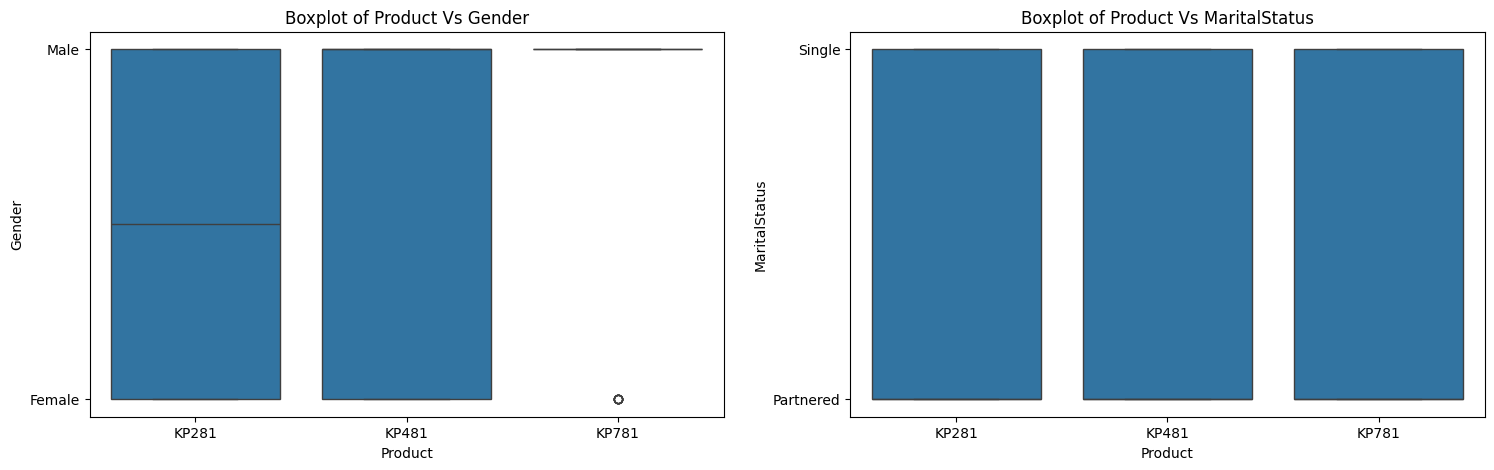

In [48]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df_final['Product'], y=df_final['Gender'], data=df_final)
plt.title("Boxplot of Product Vs Gender")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_final['Product'], y=df_final['MaritalStatus'], data=df_final)
plt.title("Boxplot of Product Vs MaritalStatus")

plt.show()

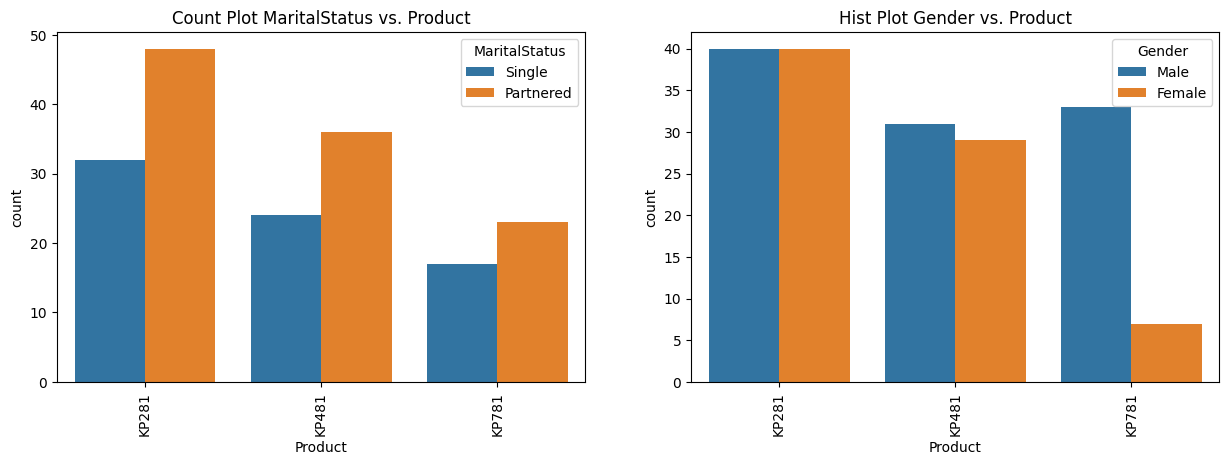

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# Subplot 1: Countplot for 'Product' vs 'MaritalStatus
plt.subplot(2, 2, 1)
sns.countplot(x='Product', hue='MaritalStatus', data=df_final)
plt.xticks(rotation=90)
plt.title("Count Plot MaritalStatus vs. Product")
# Subplot 2: histplot for for 'Product' vs 'Gender
plt.subplot(2, 2, 2)
sns.countplot(x='Product', hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("Hist Plot Gender vs. Product")

plt.show()

**Q3.3. For correlation: Heatmaps, Pairplots**

**Heatmap for numerical columns**

In [50]:
num_df = df_final.select_dtypes(include=[int])
num_df

,Age,Education,Usage,Fitness,Income,Miles
0,18,14,3,4,29562,112
1,19,15,2,3,31836,75
2,19,14,4,3,30699,66
3,19,12,3,3,32973,85
4,20,13,4,2,35247,47
...,...,...,...,...,...,...
175,40,21,6,5,83416,200
176,42,18,5,4,89641,200
177,45,16,5,5,90886,160
178,47,18,4,5,104581,120


In [51]:
num_df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


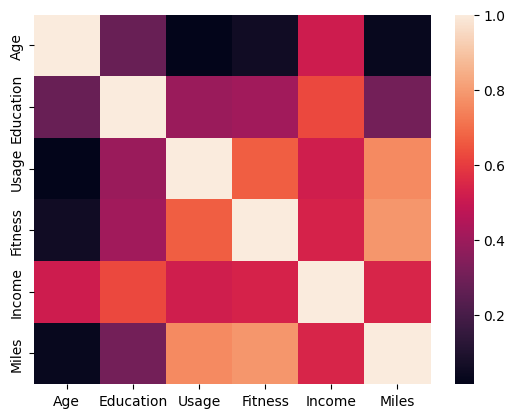

In [52]:
sns.heatmap(num_df.corr())
plt.show()

**Heatmap for categorical column**

In [53]:
cat_df = categorical_df.select_dtypes(include=['category'])
cat_df

,Product,Gender,MaritalStatus
0,KP281,Male,Single
1,KP281,Male,Single
2,KP281,Female,Partnered
3,KP281,Male,Single
4,KP281,Male,Partnered
...,...,...,...
175,KP781,Male,Single
176,KP781,Male,Single
177,KP781,Male,Single
178,KP781,Male,Partnered


In [54]:
gender_ct = pd.crosstab(categorical_df['Product'], categorical_df['Gender'])

marital_ct = pd.crosstab(categorical_df['Product'], categorical_df['MaritalStatus'])

result = pd.concat([gender_ct, marital_ct], axis=1).fillna(0).astype(int)

result

,Female,Male,Partnered,Single
Product,,,,
KP281,40,40,48,32
KP481,29,31,36,24
KP781,7,33,23,17


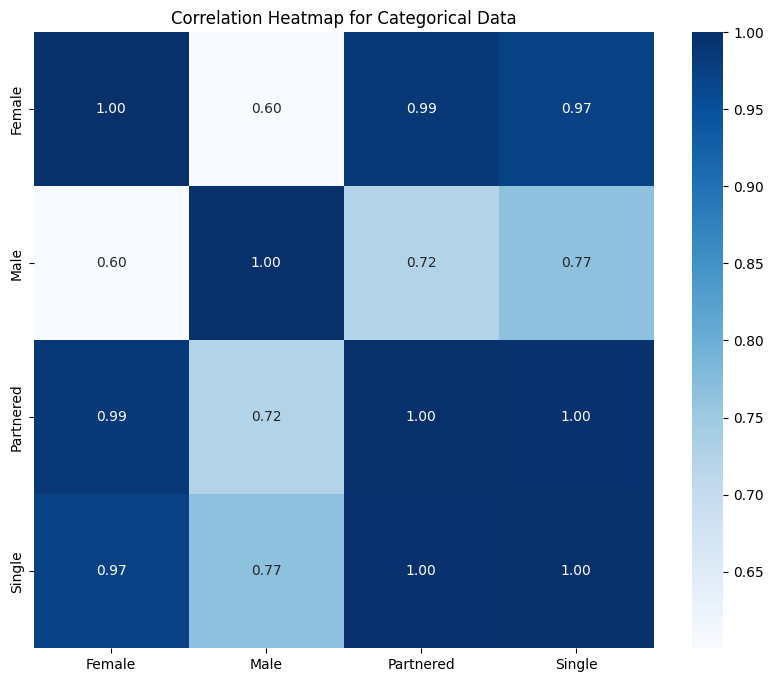

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(result.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap for Categorical Data")
plt.show()

**Pair Plot for numerical and categrical**

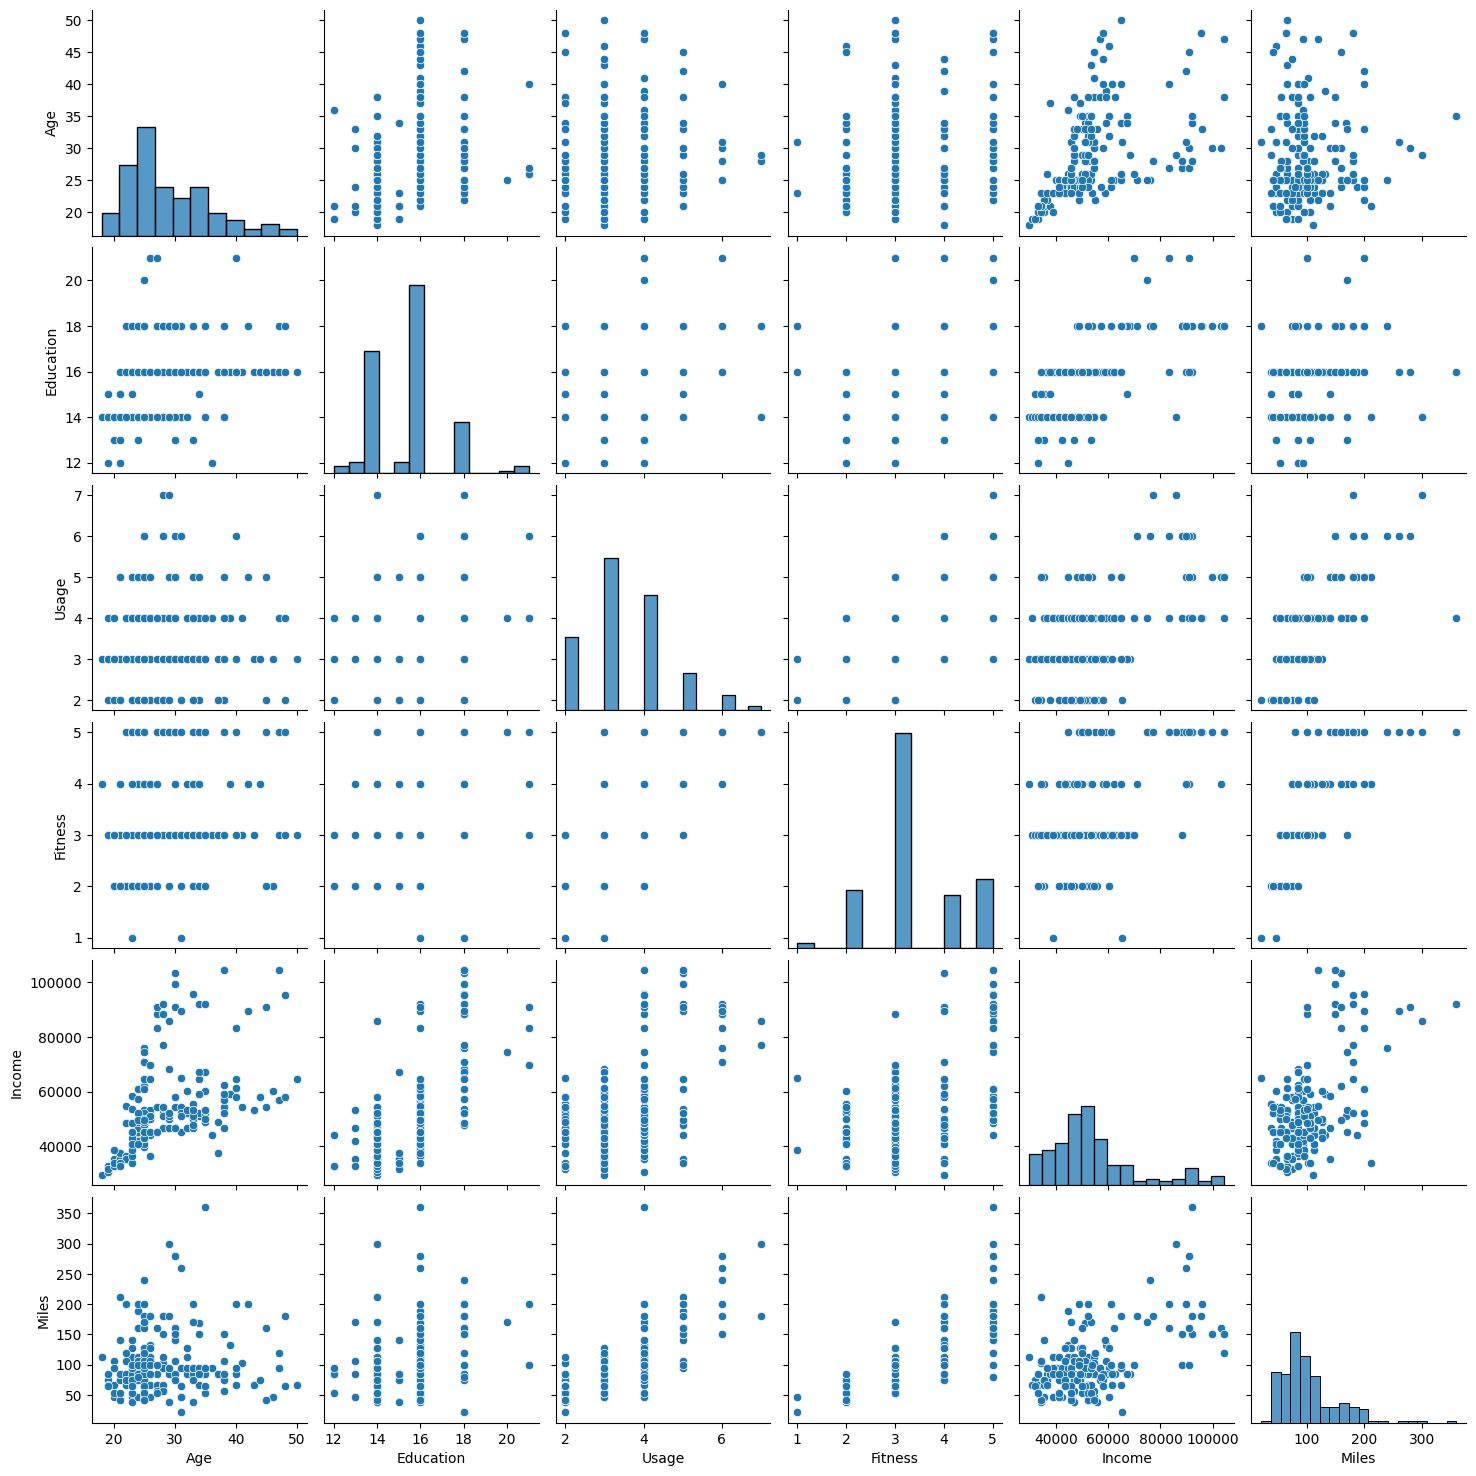

In [56]:
sns.pairplot(data=df_final)
plt.show()

**Q4. Missing Value & Outlier Detection**

**a. Missing Value**

In [57]:
df_final.isna().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


None of the column has missing/NaN values.

**b. Outlier Detetction**

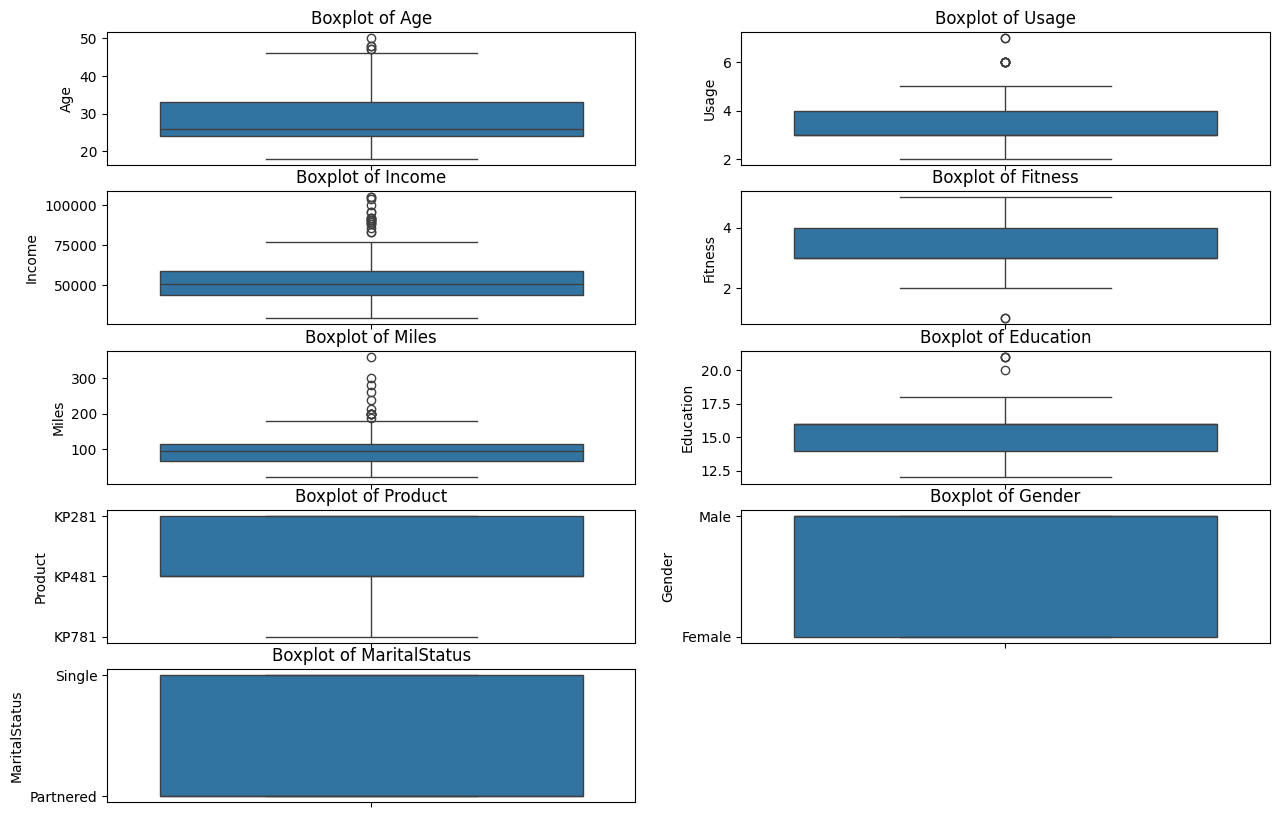

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
num_cols = ['Age', 'Usage', 'Income', 'Fitness', 'Miles', 'Education', 'Product','Gender','MaritalStatus']
for i, col in enumerate(num_cols, 1):
    plt.subplot(5,2, i)
    sns.boxplot(y=df_final[col], data = df_final)
    plt.title(f'Boxplot of {col}')
plt.show()

**Age:** Most users are between 20–40 years; a few older outliers are present.

**Usage:** Usage is generally consistent, with slight outliers above 6 hours.

**Income:** Right-skewed with many high outliers; majority earn between 40k–80k.

**Fitness:** Most users have mid-to-high fitness levels; a few report low scores.

**Miles:** Majority travel under 200 miles; several high mileage outliers observed.

**Education:** Clustered around 13–18 years; few users with over 18 years of education.

**Product:** Three product types (KP281, KP481, KP781); shown without variability since it's categorical.

**Gender:** More males than females, indicating gender imbalance in the dataset.

**MaritalStatus:** More single users than partnered ones, showing demographic skew.

**Q5. Business Insights based on Non-Graphical and Visual Analysis**

**Q.5.1. Comments on the range of attributes**

In [59]:
categorical_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Comments for numerical columns-**

**Age:** Average age is ~29, with most users between 24–33; range spans from 18 to 50 years.

**Education:** Users generally have 15–16 years of education, with a max of 21 years.

**Usage:** Median usage is 3 hours, with a few users reaching up to 7 hours.

**Fitness:** Average fitness rating is 3.3; most users fall between 3 and 4.

**Income:** Average income is ₹53.7k, but max goes beyond ₹1 lakh, indicating some high earners.

**Miles:** Mean travel is ~103 miles; max of 360 miles shows notable outliers.

In [60]:
cat_summary = categorical_df.describe(include='category').T
cat_summary

,count,unique,top,freq
Product,180,3,KP281,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


**Comments on categorical columns-**

**Product:** There are 3 product types, with KP281 being the most popular (used by 80 out of 180 users).

**Gender:** Males dominate the dataset, making up 104 of the 180 entries.

**MaritalStatus:** Partnered individuals slightly outnumber singles, with 107 occurrences.

**Q.5.2. Comments on the distribution of the variables and relationship between them**

**Distribution of the variables-**

Please refer Q4.(part b) outlier detection for graphs

**Age:** Most users are between 20–40 years; a few older outliers are present.

**Usage:** Usage is generally consistent, with slight outliers above 6 hours.

**Income:** Right-skewed with many high outliers; majority earn between 40k–80k.

**Fitness:** Most users have mid-to-high fitness levels; a few report low scores.

**Miles:** Majority travel under 200 miles; several high mileage outliers observed.

**Education:** Clustered around 13–18 years; few users with over 18 years of education.

**Product:** Three product types (KP281, KP481, KP781); shown without variability since it's categorical.

**Gender:** More males than females, indicating gender imbalance in the dataset.

**MaritalStatus:** More single users than partnered ones, showing demographic skew.

**Relationship between variables**

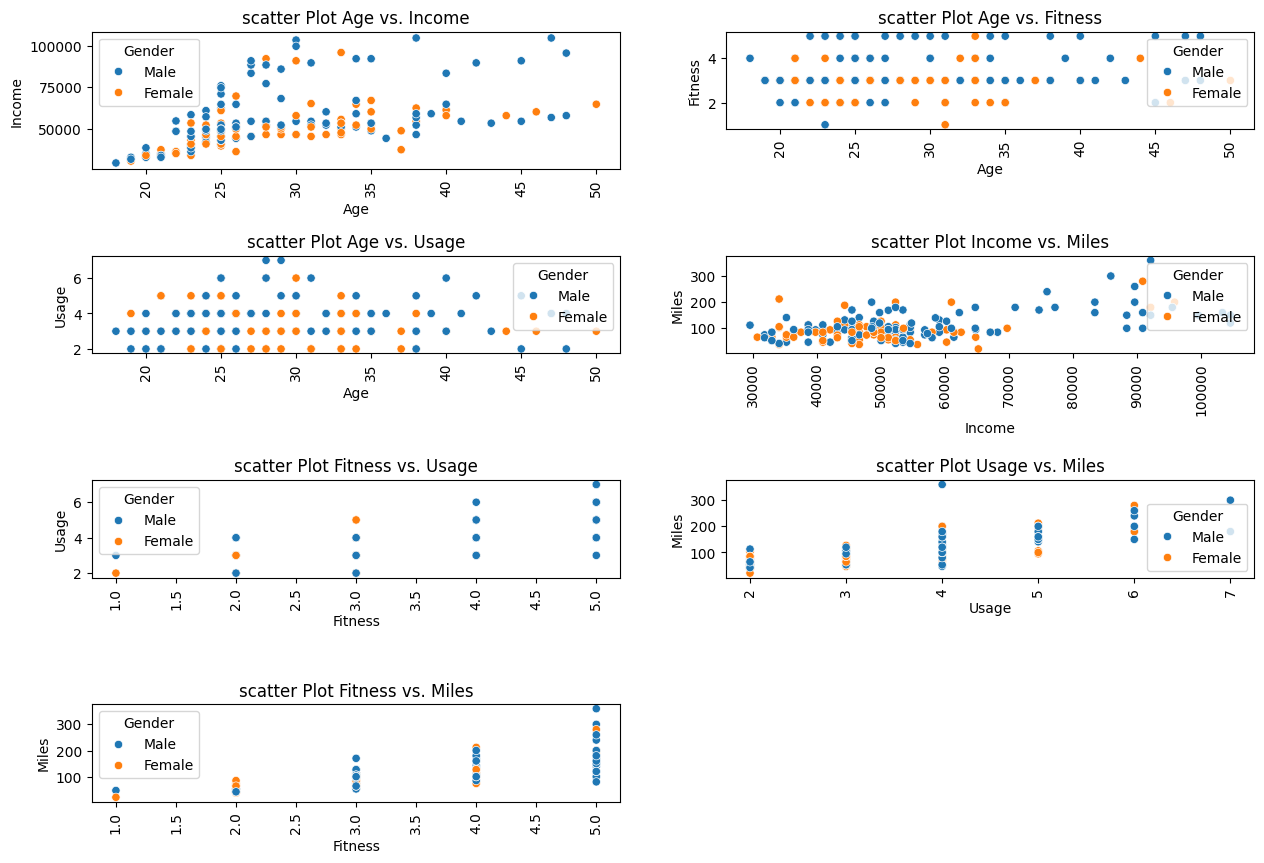

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(3, 2, 1)
sns.scatterplot(x='Age', y='Income',hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("scatter Plot Age vs. Income")
plt.subplot(4, 2, 2)
sns.scatterplot(x='Age', y='Fitness', hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("scatter Plot Age vs. Fitness")
plt.subplot(4, 2, 3)
sns.scatterplot(x='Age', y='Usage',hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("scatter Plot Age vs. Usage")
plt.subplot(4, 2, 4)
sns.scatterplot(x='Income', y='Miles',hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("scatter Plot Income vs. Miles")
plt.subplot(4, 2, 5)
sns.scatterplot(x='Fitness', y='Usage',hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("scatter Plot Fitness vs. Usage")
plt.subplot(4, 2, 6)
sns.scatterplot(x='Usage', y='Miles',hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("scatter Plot Usage vs. Miles")
plt.subplot(4, 2, 7)
sns.scatterplot(x='Fitness', y='Miles',hue='Gender', data=df_final)
plt.xticks(rotation=90)
plt.title("scatter Plot Fitness vs. Miles")
plt.subplots_adjust(hspace=1.3)
plt.show()

**Age vs. Income:** Slight positive trend—income increases with age; males dominate higher income brackets.

**Age vs. Fitness:** No clear correlation; fitness ratings are fairly distributed across ages.

**Age vs. Usage:** Younger users show a slightly higher range of usage hours.

**Income vs. Miles:** Mild upward trend—higher income groups tend to travel more miles.

**Fitness vs. Usage:** Higher fitness levels are loosely associated with higher usage.

**Usage vs. Miles:** Positive trend—more usage correlates with more miles traveled.

**Fitness vs. Miles:** Slight positive trend—fit individuals may be more active, reflected in miles.

**Q.5.3. Comments for each univariate and bivariate plot**

**Univariate**

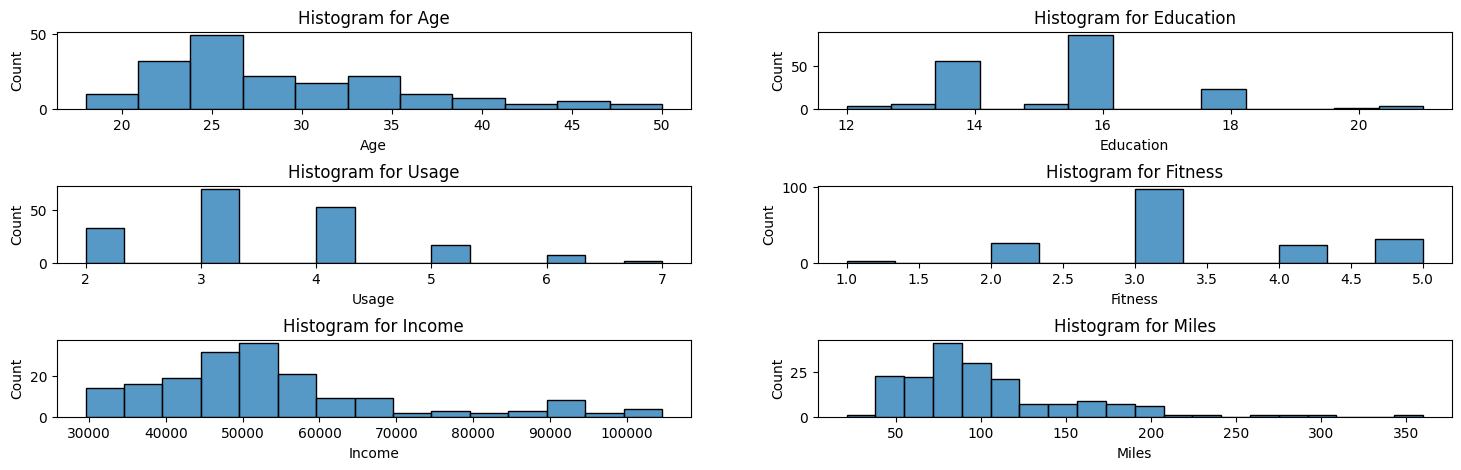

In [62]:
plt.figure(figsize=(18,5))

plt.subplot(3, 2, 1)
plt.title("Histogram for Age")
sns.histplot(x='Age',data=df_final)

plt.subplot(3, 2, 2)
plt.title("Histogram for Education")
sns.histplot(x='Education',data=df_final)

plt.subplot(3, 2, 3)
plt.title("Histogram for Usage")
sns.histplot(x='Usage',data=df_final)

plt.subplot(3, 2, 4)
plt.title("Histogram for Fitness")
sns.histplot(x='Fitness',data=df_final)

plt.subplot(3, 2, 5)
plt.title("Histogram for Income")
sns.histplot(x='Income',data=df_final)

plt.subplot(3, 2, 6)
plt.title("Histogram for Miles")
sns.histplot(x='Miles',data=df_final)

plt.subplots_adjust(hspace=1)
plt.show()

**1. Age**

Most customers are between 23 and 30 years old.

Comment: The target audience is mostly young adults—this group values fitness and is likely starting or stabilizing their career. Marketing can focus on lifestyle, energy, and health benefits.

**2. Education**

Majority of users have about 15–16 years of education.

Comment: The customer base is well-educated, so they’re likely to research before buying. Marketing should highlight technical features, comparisons, and performance stats.

**3. Usage**

Usage is concentrated around 3 to 4.

Comment: Customers are regular users, not occasional ones. Focus on promoting features like workout tracking, programs, and comfort during extended use.

**4. Fitness**

Most customers rated their fitness as 3.

Comment: These users are not beginners, but also not extreme athletes. Products should support fitness improvement goals and progress tracking.

**5. Income**

Income peaks between 45,000–55,000, with a spread from 30,000 to 70,000.

Comment: The treadmills attract a middle-income segment, so price-to-feature balance is important. Continue offering affordable yet feature-rich products.

**6. Miles**

Most customers run around 80–120 miles, with a wide range up to 350.

Comment: Users are serious runners. Emphasize durability, low-noise motors, and running comfort in product messaging.

**Bivariate**

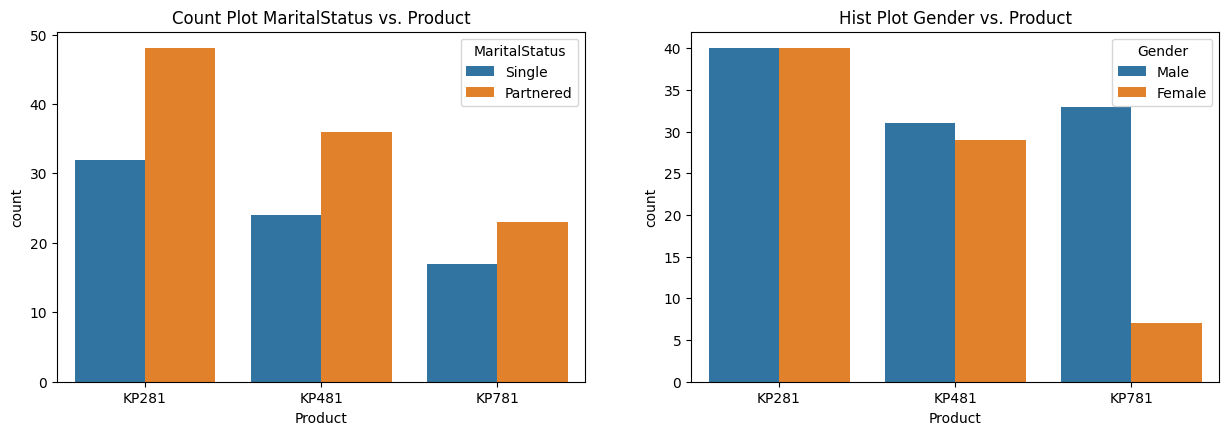

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
# Subplot 1: Countplot for 'Product' vs 'MaritalStatus
plt.subplot(2, 2, 1)
sns.countplot(x='Product', hue='MaritalStatus', data=df_final)
plt.title("Count Plot MaritalStatus vs. Product")

# Subplot 2: histplot for for 'Product' vs 'Gender
plt.subplot(2, 2, 2)
sns.countplot(x='Product', hue='Gender', data=df_final)
plt.title("Hist Plot Gender vs. Product")

plt.show()

**Marital Status vs. Product**

All three products are more popular among partnered customers, especially KP281, which shows the strongest preference from this group.

This suggests that KP281 may be seen as a shared or family-friendly treadmill.

KP781 is comparatively balanced, indicating it may attract individual users regardless of marital status.

**Gender vs. Product**

KP281 is gender-neutral, making it suitable for mass marketing.

KP781 is highly male-oriented, possibly due to its advanced features or higher price.

KP481 shows moderate gender balance, slightly leaning male.

**Q6. Recommendations - Actionable items for business.**

**Business Insights:**

**KP281 is the most preferred model overall.**

It’s popular with both men and women, and with single and partnered customers. This tells me it’s a well-rounded product that appeals to a wide customer base.

**KP781 is mostly bought by male customers.**

The difference is quite noticable — very few female buyers are going for this model. So, I think there’s a gap we could work on here.

**KP481 has a balanced reach.**

It’s somewhere in between — not too down, not too general. It attracts both genders and works for both singles and couples.

**Customer preferences differ by lifestyle.**

Age, marital status, and income all seem to influence which model people prefer. Younger users lean toward compact, affordable models, while more established customers seem to value durability and performance.

**Recommendations**

**Keep KP281 at the center of general marketing.**

Since it works well across different groups, it should be highlighted more often — in ads, online stores, and promotional campaigns.

**Rework the approach for KP781 to attract more women.**

Maybe it’s the look, the size, or how it’s presented — but it’s clearly not connecting with female users. A small shift in messaging or even just targeted campaigns could help.

**Position KP481 as the ideal “family or partner” treadmill.**

With its balanced appeal, we could easily market this for couples, roommates, or families looking to share fitness equipment.

**Make marketing more personal.**

Based on the customer’s age, lifestyle, or fitness level, we could suggest the most suitable treadmill. It feels more thoughtful and would likely improve conversion rates.

**Actionable Steps**

Highlight KP281 in homepage banners and email campaigns as the “best fit for everyone.”

Run a limited-time KP781 campaign focused on women — maybe include testimonials or demo sessions at gyms.

Bundle KP481 with accessories or offer a “Buy with a partner” discount.

Use customer info (like age or fitness goals) to personalize website recommendations and ads.